In [1]:
import pandas as pd

TSLA = '/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv'
df = pd.read_csv(filepath_or_buffer=TSLA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df['Mid'] =  0.5 * df['Close'] + df['Open']
df['dollars'] = df['Mid'] * df['Volume']
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,year,Mid,dollars
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,2010,30.945000,5.807231e+08
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,2010,37.705001,6.480396e+08
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,2010,35.979999,2.957124e+08
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2010,32.600001,1.675575e+08
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,2010,28.055000,1.926509e+08


Does our adjusted close prices tell us anything we don't know from the closing prices?

<Axes: xlabel='Close', ylabel='Adj Close'>

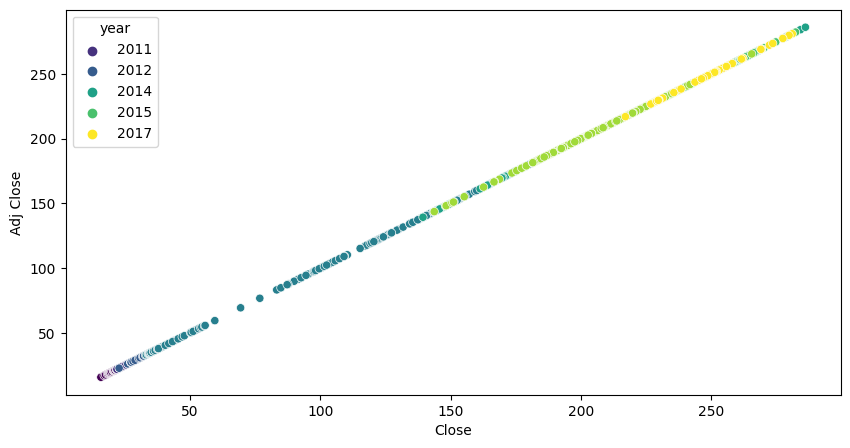

In [2]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Close', y='Adj Close', hue='year', palette='viridis')

No; there have apparently not been any splits or dividends. We can tell from this plot that our prices have some retrenchment, because we see later values higher than earlier values in some places.

Let's look at the closing price time series.

<Axes: xlabel='Date', ylabel='Close'>

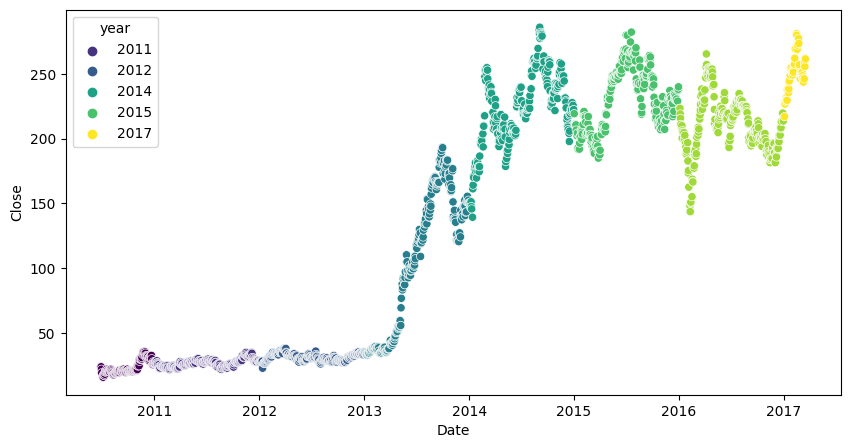

In [3]:
plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis')

There's been a lot of price retrenchment after a big run-up over the period from about mid-2013 through mid-2014.

<Axes: xlabel='Date', ylabel='Close'>

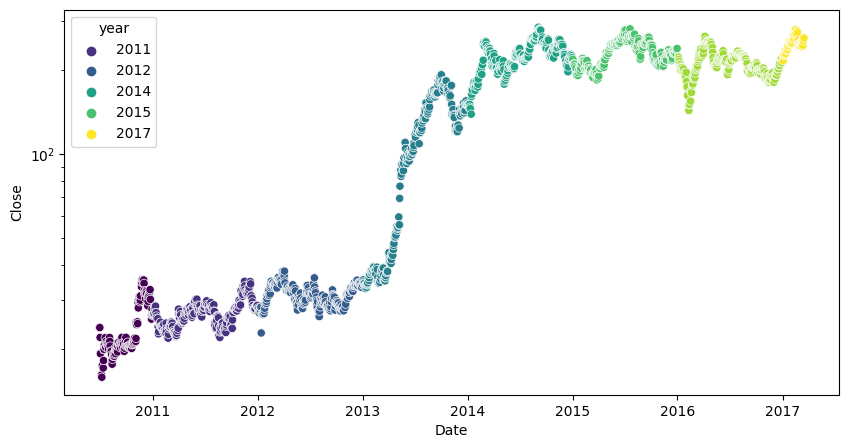

In [4]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis')

If we look at a log plot of the closing prices we see the early volatility looks a lot like the later volatility, just at a different price level.

We built a synthetic dollar value traded out of the daily mid price and the volume. What would we expect it to do over time?

<Axes: xlabel='Date', ylabel='dollars'>

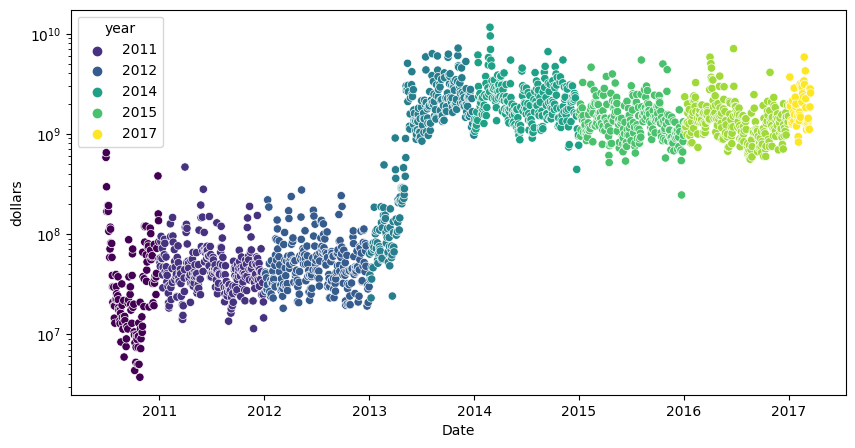

In [5]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', hue='year', palette='viridis')

The dollars traded look a lot like the prices; we see two trading ranges with a jump in the middle, during the one big price run-up.

Is volume a function of price, or vice versa?

<Axes: xlabel='Close', ylabel='Volume'>

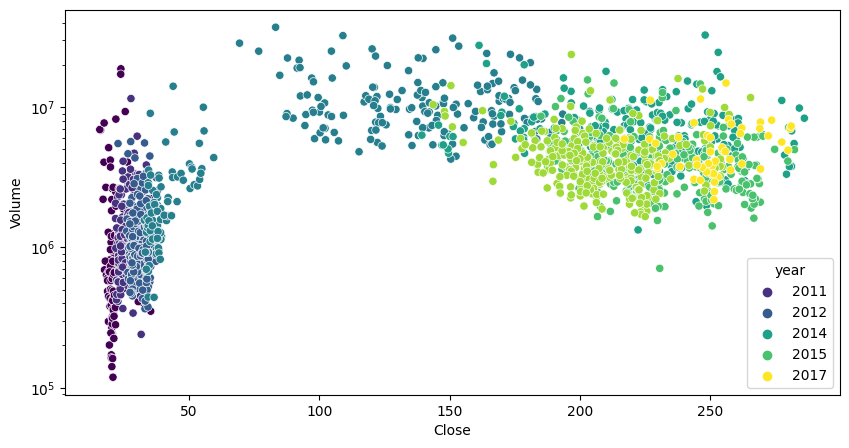

In [6]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='viridis')

Because we see prices in ranges with one run-up, we see the early and late cohorts in this graph too.